In [1]:
from chatterjee import chatt
from chatterjee import chatt_table
from chatterjee import chatt_pval
import pandas as pd
import math
import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns

The distribution and correlations of COSINE function


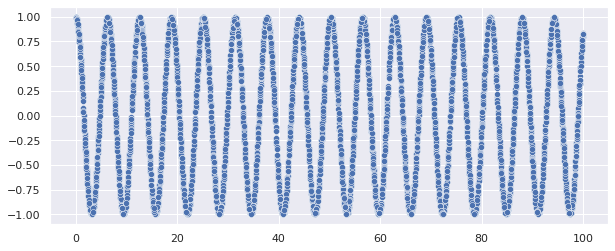

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.016191,-0.015828,-0.010618,0.99075,0.00179


The distribution and correlations of TANGENT function


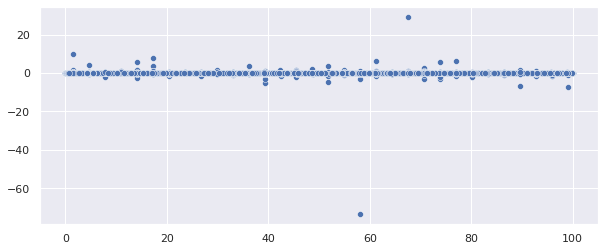

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.009759,-0.026662,-0.011986,0.981322,-0.013576


The distribution and correlations of LOG function


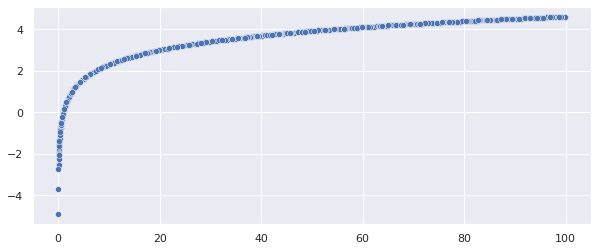

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.872149,0.999982,0.99749,0.999478,0.994378


The distribution and correlations of -SQUARE function


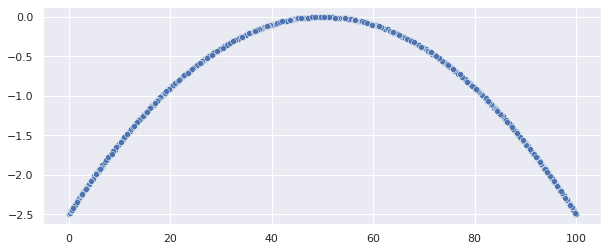

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.003096,-0.006247,-0.006272,0.999262,0.235842


The distribution and correlations of RANDOM function


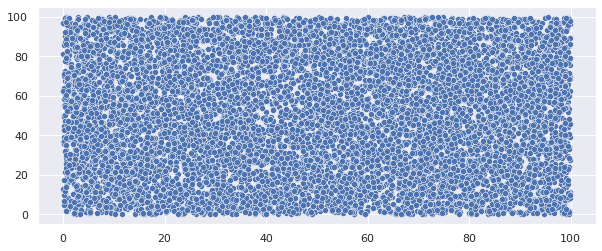

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.000339,0.000324,0.000208,-0.018667,-0.007818


In [53]:
# magic happens mainly here

# seed is start of Kazimierz IV Jagiellonczyk reign
rnd.seed = 1447

# make plots bigger
sns.set(rc={'figure.figsize':(10, 4)})

# generate data
X = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

Y_cos  = [round(math.cos(a), 2) for a in X]
Y_tan  = [round((math.tan(a))/100, 2) for a in X]
Y_log  = [round(math.log(a), 2) for a in X]

Y_sqr  = [round((math.pow(a-50, 2)*(-1))/1000, 2) for a in X]

Y_rnd = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

# dict to use in for loop
dict_of_Ys = {'COSINE': Y_cos, 'TANGENT': Y_tan, 'LOG': Y_log, 
              '-SQUARE': Y_sqr, 'RANDOM':  Y_rnd}

# it feels like this is not a place to define functions, but 
# I dont know what is
def add_noise(Y, noise_value):
    return [a + rnd.uniform(-noise_value, noise_value) for a in Y]

# ARE YOU READY!?
# MAKE SOME NOOOOIIIISSEEEEE!!!!
noisy_dict_of_Ys = {key: add_noise(value, 0.5) for key, value in dict_of_Ys.items()}

# for noisless version
for key, Y in dict_of_Ys.items():

# for noisy version
# for key, Y in noisy_dict_of_Ys.items():
    
    print(f'The distribution and correlations of {key} function')

    # distribution plot
    sns.scatterplot(x=X, y=Y)
    plt.show()

    # finally calculate them correlations
    dict_pd = {'X': X, 'Y': Y}
    df = pd.DataFrame(dict_pd)

    df_corr_dict = {}

    df_corr_dict['PEARSON'] = [df['X'].corr(df['Y'])]
    df_corr_dict['SPEARMAN'] = [df['X'].corr(df['Y'], method = 'spearman')]
    df_corr_dict['KENDALL'] = [df['X'].corr(df['Y'], method = 'kendall')]

    df_corr_dict['CHATTERJEE1'] = chatt(df['X'], df['Y'])
    df_corr_dict['CHATTERJEE2'] = chatt(df['Y'], df['X'])

    # little DataFrame for nicer presentation
    df_corr = pd.DataFrame(df_corr_dict)
    display(df_corr)

Spearman Correlations


,X,COSINE,TANGENT,LOG,-SQUARE,RANDOM
X,1.000000,-0.015828,-0.026662,0.999982,-0.006247,0.000324
COSINE,-0.015828,1.000000,0.001695,-0.015857,0.023786,-0.004295
TANGENT,-0.026662,0.001695,1.000000,-0.026635,0.003468,-0.004942
LOG,0.999982,-0.015857,-0.026635,1.000000,-0.006192,0.000336
-SQUARE,-0.006247,0.023786,0.003468,-0.006192,1.000000,-0.001161
RANDOM,0.000324,-0.004295,-0.004942,0.000336,-0.001161,1.000000


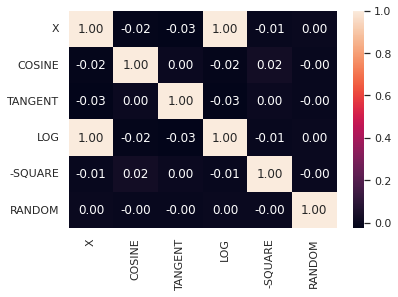


 Chatterjee Correlations


,X,COSINE,TANGENT,LOG,-SQUARE,RANDOM
X,1.000000,0.001790,-0.013576,0.994378,0.235842,-0.007818
COSINE,0.990750,1.000000,0.208419,0.843362,0.701095,0.010909
TANGENT,0.981322,0.320489,1.000000,0.712430,0.394861,0.044455
LOG,0.999478,0.001857,-0.013470,1.000000,0.235941,-0.007820
-SQUARE,0.999262,-0.002333,-0.007282,0.989649,1.000000,0.008366
RANDOM,-0.018667,0.004241,0.006789,0.001108,0.000117,1.000000


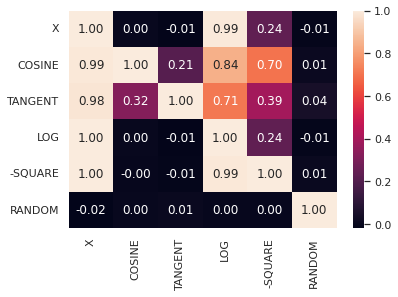

In [55]:
# correlation table and heatmap

dict_of_Ys['X'] = X
noisy_dict_of_Ys['X'] = X

# for noisless version
df_vars = pd.DataFrame(dict_of_Ys)

# for noisy version
# df_vars = pd.DataFrame(noisy_dict_of_Ys)

# X first (kinda headache o a code, looking for better ideas)
df_vars = df_vars[['X'] + df_vars.columns.tolist()[:-1]]

# Spearman corr table and heatmap
print('Spearman Correlations')

display(df_vars.corr(method='spearman'))

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_vars.corr(method='spearman'), annot=True, fmt=".2f")
plt.show()

# chatterjee corr table and heatmap
print('\n Chatterjee Correlations')

df_corr_chatt = chatt_table(df_vars)
display(df_corr_chatt)

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_corr_chatt, annot=True, fmt=".2f")
plt.show()


In [23]:
# never do that, but it's kinda fun

def corr2(self):
    return chatt_table(self)

pd.DataFrame.corr2 = corr2

df_vars.corr2()

,COSINE,TANGENT,LOGATRITHM,REVERSED SQUARE,RANDOM
COSINE,1.000000,0.202254,0.843580,0.696699,-0.002997
TANGENT,0.316615,1.000000,0.715257,0.388441,0.043850
LOGATRITHM,-0.005125,0.001607,1.000000,0.247084,-0.010018
REVERSED SQUARE,-0.007722,-0.010678,0.989895,1.000000,-0.006058
RANDOM,-0.004642,0.004168,-0.006183,0.007204,1.000000
